<a href="https://colab.research.google.com/github/Dr-Carlos-Villasenor/RNA_Libro/blob/main/P07_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Artificiales
# Capítulo 7
## Ejercicio práctico 7.14
### Red Neuronal Convolucional

Elaborado por: Nancy Arana-Daniel, Carlos Lopez-Franco, Javier Gomez-Avila, Carlos Villaseñor


(Información del Copyright)

## Introducción

En este ejercicio practico haremos un clasificador de dígitos escritos a mano alzada. La entrada a la red neuronal son imagenes en escala de grises y la salida es la clase de número al que pertenecen.

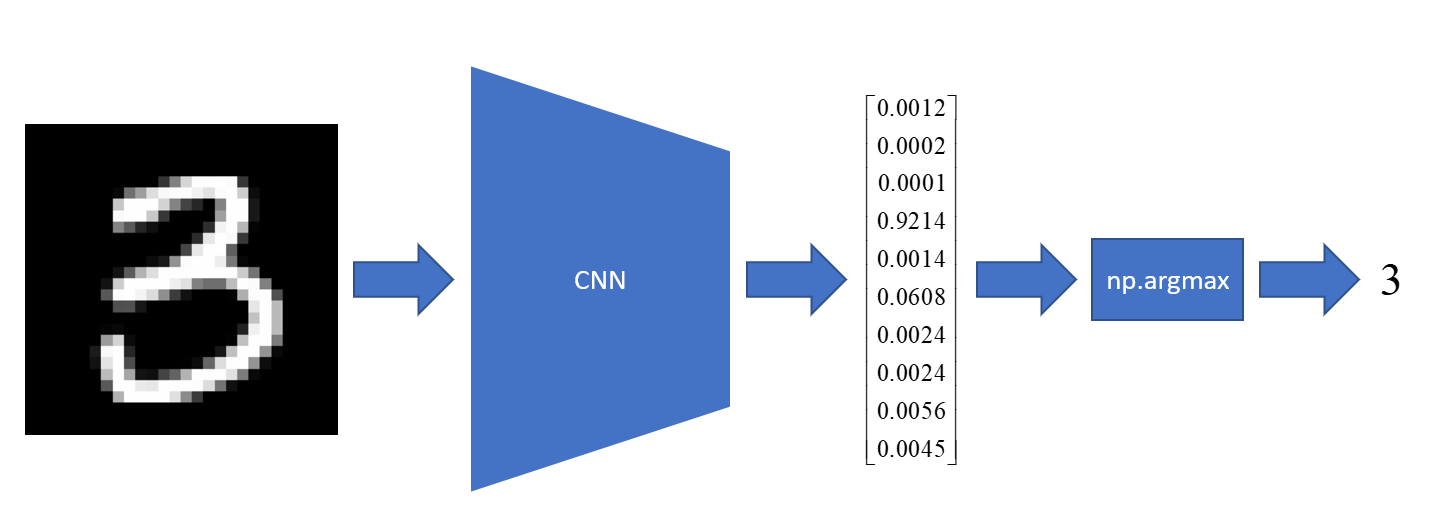

## Ejercicio práctico
1. Primeramente importamos los paquetes que necesitaremos.

In [1]:
# Importamos numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Importamos lo necesario para crear la red
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

# Importamos unos paquetes de sklearn para comprobar el modelo
from sklearn.metrics import classification_report, confusion_matrix

2. Cargamos el conjunto de datos de MNIST (http://yann.lecun.com/exdb/mnist/), este es un conjunto de imagenes de 28x28 pixeles de los digitos del 0 al 9 escritos a mano alzada. MNIST contiene 60000 imagenes para entranar y 10000 para probar.

In [9]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

3. Visualizamos ejemplos aleatorios del conjunto de datos (puedes correr el siguiente bloque varias veces).

Text(0.5, 1.0, 'Label: 3')

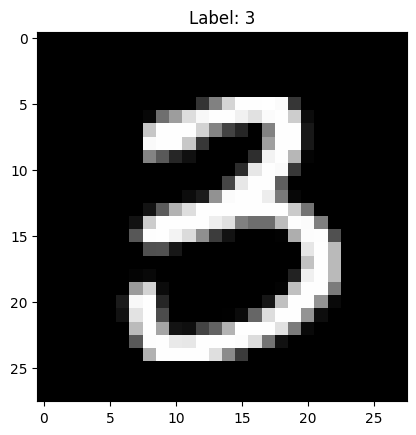

In [10]:
sample = np.random.randint(0,60000)
plt.imshow(xtrain[sample], cmap=plt.cm.gray)
plt.title('Label: ' + str(ytrain[sample]))

4. Para poder utilizar estas imagenes en una red neuronal es necesario normalizarlas, es decir que cada pixel sea un número flotante entre 0 y 1 (recordemos que los pixeles son números entreros entre 0-255). Además de esto necesitamos que la imagen sea un tensor de grado 3 con shape (nx, ny, nc). Por lo que hacemos el siguiente tratamiento:

In [11]:
# Normalizamos la imagenes
xtrain = xtrain.astype('float32')/255
xtest = xtest.astype('float32')/255

# Agregamos el número de canales
xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Mostramos el tamaño del conjunto de entrenamiento
print('Conjunto de entrenamiento: ', xtrain.shape)
print('Tamaño de cada imagen: ', input_shape)

Conjunto de entrenamiento:  (60000, 28, 28, 1)
Tamaño de cada imagen:  (28, 28, 1)


5. La salida también necesita tratamiento, por lo que debemos de convertir los números a su codificación one-hot. Por ejemplo, la clase 3 se convertiria en el vector [0,0,0,1,0,0,0,0,0,0]^T.

In [12]:
ytrain = keras.utils.to_categorical(ytrain, 10)

6. Construimos la Red Neuronal Concolucional. En este ejercicio tendrás que determinar la última capa de la red

In [13]:
def build_model():
  model = Sequential()

  model.add(Conv2D(32,kernel_size=(3,3),
                   activation='relu',
                   input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))

  # Escribe áquí tu código ----------------------------------
  model.add(Dense(10, activation='softmax'))

  # ---------------------------------------------------------

  model.compile(loss = keras.losses.categorical_crossentropy,
                optimizer = 'adam',
                metrics=['accuracy'])
  return model

In [14]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [15]:
model.fit(xtrain, ytrain, batch_size=215, epochs=6, verbose=1,
          validation_split=0.17)

Epoch 1/6
232/232 [==============================] - 24s 99ms/step - loss: 0.8257 - accuracy: 0.7265 - val_loss: 0.1652 - val_accuracy: 0.9498
Epoch 2/6
232/232 [==============================] - 22s 96ms/step - loss: 0.2599 - accuracy: 0.9224 - val_loss: 0.0956 - val_accuracy: 0.9705
Epoch 3/6
232/232 [==============================] - 24s 104ms/step - loss: 0.1831 - accuracy: 0.9459 - val_loss: 0.0759 - val_accuracy: 0.9768
Epoch 4/6
232/232 [==============================] - 23s 97ms/step - loss: 0.1482 - accuracy: 0.9562 - val_loss: 0.0615 - val_accuracy: 0.9818
Epoch 5/6
232/232 [==============================] - 23s 99ms/step - loss: 0.1271 - accuracy: 0.9626 - val_loss: 0.0604 - val_accuracy: 0.9821
Epoch 6/6
232/232 [==============================] - 23s 98ms/step - loss: 0.1175 - accuracy: 0.9658 - val_loss: 0.0525 - val_accuracy: 0.9842


In [16]:
ypred=model.predict(xtest)
print('Salida de la red:\n', ypred[0])

ypred = np.argmax(ypred, axis=1)
print('Predicciones:\n', ypred)

print('Reporte de clasificación:\n', classification_report(ytest, ypred))
print('Matriz de confusión:\n', confusion_matrix(ytest, ypred))

313/313 [==============================] - 3s 9ms/step
Salida de la red:
 [1.11539515e-08 2.40914119e-06 2.09762129e-05 3.10110499e-06
 1.57511704e-09 1.83932214e-09 1.04510205e-12 9.99973238e-01
 3.85269594e-09 2.77851768e-07]
Predicciones:
 [7 2 1 ... 4 5 6]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.96      0.97      0.97      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted

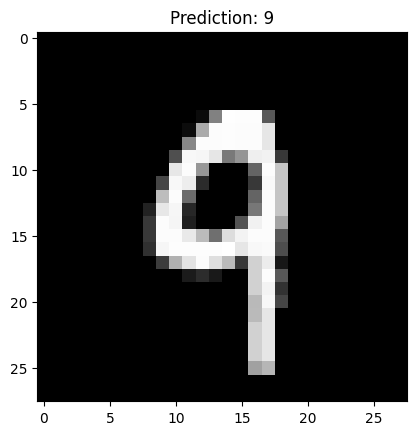

In [17]:

sample = np.random.randint(0,10000)
x = xtest[sample].reshape(28,28)
plt.imshow(x, cmap=plt.cm.gray)
plt.title('Prediction: ' + str(ypred[sample]))
plt.show()